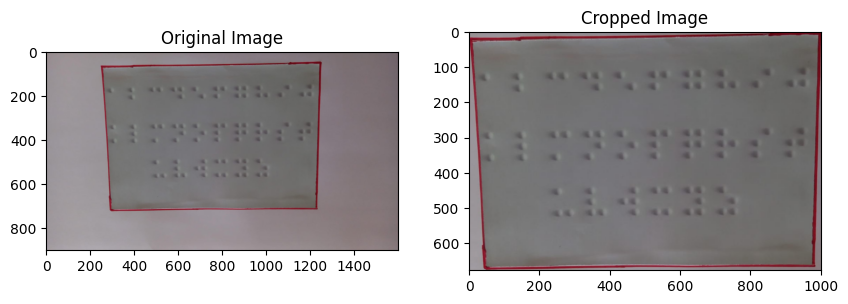

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("box.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150, apertureSize=3)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assuming it's the box)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the region of the box
    cropped_image = image[y:y + h, x:x + w]

    # Save the cropped image
    cv2.imwrite("cropped_box_image.jpg", cropped_image)

# Display the original image and the image being cropped
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)), plt.title("Cropped Image")
plt.show()
